<a href="https://colab.research.google.com/github/laxmiharikumar/Tips-Tricks/blob/master/Muticlass_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-class image classification

1. Become one with the data
2. Preprocess the data (get it ready for the model)
3. Create a model (baseline)
4. Fit the model (overfit it to make sure that it works)
5. Evaluate the model
6. Adjust the different hyper parameters and improve the model (try to beat the baseline/reduce overfitting)
7. Repeat until satisfied

In [1]:
## 1. Become one with the data

!wget "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip"

import zipfile

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

--2023-01-10 01:05:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  24.0MB/s    in 22s     

2023-01-10 01:05:38 (22.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
# Check the folders
import os

for dir_path, dir_names, file_names in os.walk("10_food_classes_all_data"):
  print(f"The folder {dir_path} has {len(dir_names)} directories and {len(file_names)} files")

The folder 10_food_classes_all_data has 2 directories and 0 files
The folder 10_food_classes_all_data/train has 10 directories and 0 files
The folder 10_food_classes_all_data/train/fried_rice has 0 directories and 750 files
The folder 10_food_classes_all_data/train/pizza has 0 directories and 750 files
The folder 10_food_classes_all_data/train/chicken_wings has 0 directories and 750 files
The folder 10_food_classes_all_data/train/ice_cream has 0 directories and 750 files
The folder 10_food_classes_all_data/train/steak has 0 directories and 750 files
The folder 10_food_classes_all_data/train/sushi has 0 directories and 750 files
The folder 10_food_classes_all_data/train/hamburger has 0 directories and 750 files
The folder 10_food_classes_all_data/train/ramen has 0 directories and 750 files
The folder 10_food_classes_all_data/train/grilled_salmon has 0 directories and 750 files
The folder 10_food_classes_all_data/train/chicken_curry has 0 directories and 750 files
The folder 10_food_clas

In [3]:
# Get class names
import pathlib
import numpy as np

data_dir = pathlib.Path("10_food_classes_all_data/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [4]:
# Set up the train and test directories

train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [5]:
# Visualize the data in the various classes randomly
# Restudy
import random
from matplotlib import pyplot as plt 
import matplotlib.image as mpimg

def view_random_image(target_dir, class_name):
  img_path = target_dir + "/" + class_name

  random_img = random.choice(os.listdir(img_path))
  print(random_img)

  image = mpimg.imread(img_path + "/" + random_img)
  plt.imshow(image)
  plt.title(class_name)
  plt.axis("off")

  print(f"Image Shape is {image.shape}")

  return image

2693460.jpg
Image Shape is (512, 383, 3)


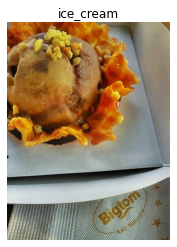

In [6]:
image = view_random_image(train_dir, random.choice(class_names))

In [7]:
## 2. Preprocess the data

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [8]:
# Load data from directories and turn them into tensors
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               class_mode="categorical",
                                               target_size=(224, 224),
                                               shuffle=True)

test_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size=32,
                                             class_mode="categorical",
                                             target_size=(224, 224),
                                             shuffle=True)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [9]:
# Create a baseline model

model_0 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,
                           padding="valid",
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="sigmoid")
])

In [10]:
# Compile the model
model_0.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [11]:
# Get the model summary
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [12]:
# Fit the model
history_0 = model_0.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 74s 272ms/step - loss: 2.1846 - accuracy: 0.2056 - val_loss: 2.0586 - val_accuracy: 0.2460
Epoch 2/5
235/235 [==============================] - 51s 215ms/step - loss: 1.9674 - accuracy: 0.3099 - val_loss: 1.9340 - val_accuracy: 0.3228
Epoch 3/5
235/235 [==============================] - 47s 199ms/step - loss: 1.6431 - accuracy: 0.4403 - val_loss: 1.8775 - val_accuracy: 0.3408
Epoch 4/5
235/235 [==============================] - 46s 195ms/step - loss: 1.0221 - accuracy: 0.6713 - val_loss: 2.4056 - val_accuracy: 0.3192
Epoch 5/5
235/235 [==============================] - 45s 193ms/step - loss: 0.4199 - accuracy: 0.8689 - val_loss: 3.2748 - val_accuracy: 0.2812


In [13]:
# Evaluate the model
model_0.evaluate(test_data)

79/79 [==============================] - 11s 141ms/step - loss: 3.2748 - accuracy: 0.2812


[3.2748055458068848, 0.28119999170303345]

In [14]:
# Plot the curves
import matplotlib.pyplot as plt

def plot_loss_and_accuracy(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.figure(figsize=(10,7))
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="validation_loss")
  plt.legend()
  plt.title("Loss Curves")

  plt.figure(figsize=(10,7))
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="validation_accuracy")
  plt.legend()
  plt.title("Accuracy Curves")

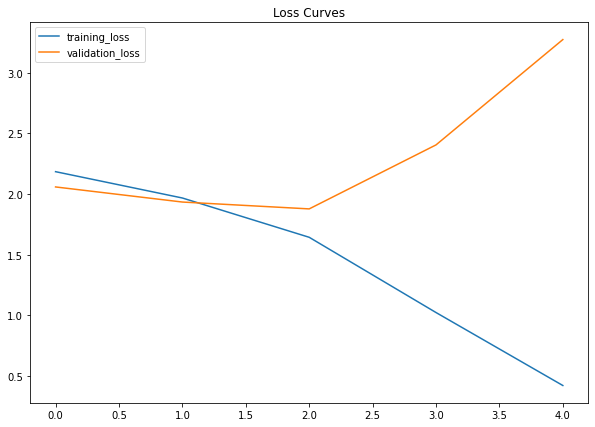

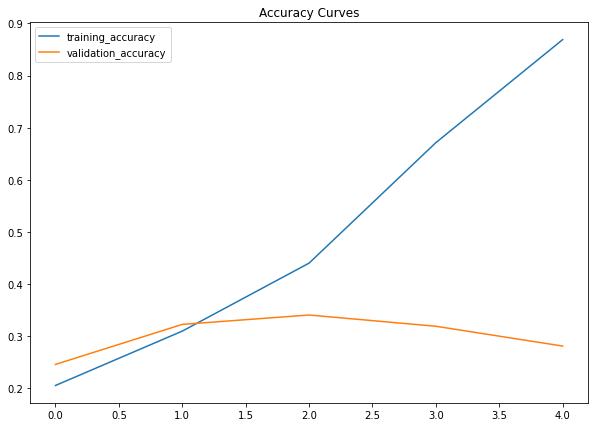

In [15]:
plot_loss_and_accuracy(history_0)

Model is overfittng. Performs poorly on test data set

## Adjust the model hyperparameters to beat basemodel / reduce overfitting

Lets try and fix overfitting by:

- Get more data
- Simplify the model - our current model might be too complicated. One way to simplify is to reduce number of layers or reduce number of hidden units in layers
- Use Data Augmentation - Data Augmentation manipulates training data to add more diversity to it
- Transfer learning 

In [ ]:
# Create a simple model

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,
                           padding="valid",
                           input_shape=(224,224,3),
                           activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [17]:
# Compile the model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [18]:
# Get the model summary
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [19]:
# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 45s 190ms/step - loss: 2.1583 - accuracy: 0.2213 - val_loss: 1.9510 - val_accuracy: 0.3020
Epoch 2/5
235/235 [==============================] - 44s 187ms/step - loss: 1.8440 - accuracy: 0.3616 - val_loss: 1.9078 - val_accuracy: 0.3404
Epoch 3/5
235/235 [==============================] - 44s 189ms/step - loss: 1.5896 - accuracy: 0.4647 - val_loss: 1.9590 - val_accuracy: 0.3060
Epoch 4/5
235/235 [==============================] - 45s 190ms/step - loss: 1.2854 - accuracy: 0.5809 - val_loss: 2.1116 - val_accuracy: 0.3004
Epoch 5/5
235/235 [==============================] - 44s 188ms/step - loss: 0.9031 - accuracy: 0.7193 - val_loss: 2.3082 - val_accuracy: 0.3152


In [ ]:
# Evaluate the model
model_1.evaluate(test_data)

In [ ]:
# Plot the curves
plot_loss_and_accuracy(history_1)

No improvement with reducing number of layers as number of parameters is greater than that in model_0
Accuracy of validation went down and overfitting continued...

Adding Conv layers will force models to learn minor features. Removing them thus was not a good idea

In [ ]:
# Try data augmentation
train_datagen_augmented = ImageDataGenerator(rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True,
                                             rescale=1/255.
                                             )

test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   class_mode="categorical",
                                                                   target_size=(224,224),
                                                                   shuffle=True,
                                                                   batch_size=32)

test_data = test_datagen.flow_from_directory(test_dir,
                                             class_mode="categorical",
                                             shuffle=True,
                                             target_size=(224,224),
                                             batch_size=32
                                             )

In [ ]:
# Create the model
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3,3),
                           strides=1,
                           padding="valid",
                           activation="relu",
                           input_shape=(224, 224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="sigmoid")
])


In [ ]:
# Compile model
model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [26]:
# Fit the model
history_3 = model_3.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        )

Epoch 1/5
235/235 [==============================] - 112s 474ms/step - loss: 2.1929 - accuracy: 0.1899 - val_loss: 2.1107 - val_accuracy: 0.2416
Epoch 2/5
235/235 [==============================] - 111s 470ms/step - loss: 2.0921 - accuracy: 0.2524 - val_loss: 1.9767 - val_accuracy: 0.3036
Epoch 3/5
235/235 [==============================] - 111s 470ms/step - loss: 2.0320 - accuracy: 0.2793 - val_loss: 1.8850 - val_accuracy: 0.3348
Epoch 4/5
235/235 [==============================] - 110s 466ms/step - loss: 1.9941 - accuracy: 0.2953 - val_loss: 1.8331 - val_accuracy: 0.3652
Epoch 5/5
235/235 [==============================] - 109s 464ms/step - loss: 1.9478 - accuracy: 0.3241 - val_loss: 1.7676 - val_accuracy: 0.4052


In [ ]:
# Evaluate the model
model_3.evaluate(test_data)

In [ ]:
#PLot the curves
plot_loss_and_accuracy(history_3)

The curves of the test data re moving in the rt direction. If we were to train for longer, we might see further improvements

## Repeat until satisfied

- Increase layers/hidden units
- Adjust learning rate
- Data Augmentation (try out different options)
- Train for longer
- Try transfer learning

In [ ]:
## Make predictions

!wget "https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-hamburger.jpeg"
!wget "https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg"
!wget "https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg"
!wget "https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-sushi.jpeg"

In [ ]:
# Import the target image and preprocess it

def load_and_prep_image(filename):

  # Read in target file
  img = tf.io.read_file(filename)

  # Decode the read file into tensor and ensure 3 channels
  img = tf.image.decode_image(img, channels=3)

  # Resizze the image
  img = tf.image.resize(img, size=[224, 224])

  # Rescale the image
  img = img/255.

  return img

In [31]:
# Reshape the image 
def pred_and_plot(model, filename, class_names=class_names):
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class 
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]

  # Plot the image and class
  plt.imshow(img)
  plt.title(f"Predicted: {pred_class}")
  plt.axis("off")

In [ ]:
pred_and_plot(model_3, "03-pizza-dad.jpeg", class_names=class_names)

In [ ]:
pred_and_plot(model_3, "03-steak.jpeg", class_names=class_names)

In [ ]:
pred_and_plot(model_3, "03-hamburger.jpeg", class_names=class_names)

All predictions were wrong on custom images
Accuracy was low

## Saving and loading a model

In [ ]:
# Save a model
model_3.save("saved_trained_model_3")

In [ ]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_3")
loaded_model_3.evaluate(test_data)

In [ ]:
# Compare the loaded model to our existing model
model_3.evaluate(test_data)